In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Importing & merging Datasets

In [3]:
claims = pd.read_csv(r"D:\AnalytixLabs\4. Python\Assignment\Case Study 3 - Insurance Claims Case Study\claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
cust = pd.read_csv(r"D:\AnalytixLabs\4. Python\Assignment\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
final = pd.merge(left=claims, right=cust, how='left', left_on='customer_id', right_on='CUST_ID')
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold


### 2. Fixing datatypes

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [7]:
category = ['claim_id','customer_id','incident_cause','claim_area','police_report','claim_type','fraudulent','gender','State','Segment']

final[category] = (final[category].astype('category'))
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   claim_id             1100 non-null   category
 1   customer_id          1100 non-null   category
 2   incident_cause       1100 non-null   category
 3   claim_date           1100 non-null   object  
 4   claim_area           1100 non-null   category
 5   police_report        1100 non-null   category
 6   claim_type           1100 non-null   category
 7   claim_amount         1035 non-null   object  
 8   total_policy_claims  1090 non-null   float64 
 9   fraudulent           1100 non-null   category
 10  CUST_ID              1085 non-null   float64 
 11  gender               1085 non-null   category
 12  DateOfBirth          1085 non-null   object  
 13  State                1085 non-null   category
 14  Contact              1085 non-null   object  
 15  Segment              

In [8]:
final.claim_date = pd.to_datetime(final.claim_date, format = '%m/%d/%Y')
final.DateOfBirth = pd.to_datetime(final.DateOfBirth, format = '%d-%b-%y')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   category      
 1   customer_id          1100 non-null   category      
 2   incident_cause       1100 non-null   category      
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   category      
 5   police_report        1100 non-null   category      
 6   claim_type           1100 non-null   category      
 7   claim_amount         1035 non-null   object        
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   category      
 10  CUST_ID              1085 non-null   float64       
 11  gender               1085 non-null   category      
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

### 3. Convert the column claim_amount to numeric. 

In [9]:
final.claim_amount = final.claim_amount.str.replace('$','').astype('float64')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   category      
 1   customer_id          1100 non-null   category      
 2   incident_cause       1100 non-null   category      
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   category      
 5   police_report        1100 non-null   category      
 6   claim_type           1100 non-null   category      
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   category      
 10  CUST_ID              1085 non-null   float64       
 11  gender               1085 non-null   category      
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

C:\Users\singh\AppData\Local\Temp\ipykernel_17376\613174446.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final.claim_amount = final.claim_amount.str.replace('$','').astype('float64')


### 4. Create an alert flag (1,0) for police report

In [10]:
final.insert(final.columns.get_loc('police_report')+1, 'flag', 0)
final.loc[~final.police_report.isin(['Yes','No']), 'flag'] = 1
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,0,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,1,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,0,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,0,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,0,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,0,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,0,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,1,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN


### 5. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [11]:
# Roughwork to check observation for duplicated customer_ids

final[final.duplicated(subset='customer_id')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
620,78221963,84147585,Driver error,2018-04-10,Auto,Yes,0,Injury only,14430.0,4.0,No,84147585.0,Male,1972-10-18,AK,743-569-4783,Gold
621,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,1,Material only,2510.0,1.0,No,85357756.0,Male,1970-01-02,PA,915-698-3649,Platinum
622,41779510,53539195,Driver error,2018-10-03,Home,No,0,Injury only,25040.0,1.0,No,53539195.0,Male,1989-10-02,NV,914-342-8239,Gold
629,63017412,30308357,Driver error,2018-04-04,Auto,No,0,Material only,1950.0,6.0,No,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
630,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,1,Material only,1440.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
631,39219616,19269962,Other causes,2018-09-26,Auto,No,0,Material only,2240.0,2.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold
632,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,1,Material and injury,36810.0,1.0,No,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold


In [12]:
# Roughwork to check observation for duplicated customer_ids

final.loc[
    final.customer_id.isin(
        final.loc[final.duplicated(subset='customer_id')]['customer_id'])]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,0,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,0,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,0,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold
603,30280492,84147585,Driver error,2017-01-07,Auto,Unknown,1,Material only,2380.0,1.0,No,84147585.0,Male,1972-10-18,AK,743-569-4783,Gold
604,23938559,85357756,Driver error,2017-02-23,Auto,No,0,Material only,2130.0,1.0,No,85357756.0,Male,1970-01-02,PA,915-698-3649,Platinum
605,2432399,53539195,Other causes,2017-12-24,Home,No,0,Material only,2480.0,1.0,No,53539195.0,Male,1989-10-02,NV,914-342-8239,Gold
620,78221963,84147585,Driver error,2018-04-10,Auto,Yes,0,Injury only,14430.0,4.0,No,84147585.0,Male,1972-10-18,AK,743-569-4783,Gold
621,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,1,Material only,2510.0,1.0,No,85357756.0,Male,1970-01-02,PA,915-698-3649,Platinum
622,41779510,53539195,Driver error,2018-10-03,Home,No,0,Injury only,25040.0,1.0,No,53539195.0,Male,1989-10-02,NV,914-342-8239,Gold


In [13]:
final.sort_values(by='claim_date', inplace = True)
final.drop_duplicates(subset = 'customer_id',keep = 'last', inplace = True)
final.sort_index(inplace = True)
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,0,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,1,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
6,12878692,18401412,Driver error,2018-01-13,Auto,No,0,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,0,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,0,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,0,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,0,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,1,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [16]:
final.isna().sum(), final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1099
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   category      
 1   customer_id          1093 non-null   category      
 2   incident_cause       1093 non-null   category      
 3   claim_date           1093 non-null   datetime64[ns]
 4   claim_area           1093 non-null   category      
 5   police_report        1093 non-null   category      
 6   flag                 1093 non-null   int64         
 7   claim_type           1093 non-null   category      
 8   claim_amount         1028 non-null   float64       
 9   total_policy_claims  1083 non-null   float64       
 10  fraudulent           1093 non-null   category      
 11  CUST_ID              1078 non-null   float64       
 12  gender               1078 non-null   category      
 13  DateOfBirth          1078 non-nul

(claim_id                0
 customer_id             0
 incident_cause          0
 claim_date              0
 claim_area              0
 police_report           0
 flag                    0
 claim_type              0
 claim_amount           65
 total_policy_claims    10
 fraudulent              0
 CUST_ID                15
 gender                 15
 DateOfBirth            15
 State                  15
 Contact                15
 Segment                15
 dtype: int64,
 None)

In [14]:
final.gender.mode()

0    Male
Name: gender, dtype: category
Categories (2, object): ['Female', 'Male']

In [15]:
final.claim_amount.mean()

12475.499513618677

In [43]:
final.total_policy_claims.mode()

0    1.0
Name: total_policy_claims, dtype: float64

In [61]:
# filtering categorical columns
cat_cols = final.select_dtypes(include='category').columns

# filtering null columns
null_cols = final.columns[final.isna().any()]

# filtering categorical null columns
cat_null_cols = cat_cols.intersection(null_cols)

for col in cat_null_cols:
    mode_value = final[col].mode()[0]
    final[col] = final[col].fillna(mode_value)

In [62]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
flag                    0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                15
gender                  0
DateOfBirth            15
State                   0
Contact                15
Segment                 0
dtype: int64

In [63]:
# inserting mode for 'total_policy_claims' even though it is left as 'int' dtype
final['total_policy_claims'].fillna(final.total_policy_claims.mode()[0], inplace=True)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,0,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,1,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
6,12878692,18401412,Driver error,2018-01-13,Auto,No,0,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,0,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,0,Material only,3059.0,4.0,Yes,NaN,Male,NaT,NY,NaN,Gold
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,0,Material only,1520.0,2.0,No,NaN,Male,NaT,NY,NaN,Gold
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,0,Material and injury,23575.0,2.0,Yes,NaN,Male,NaT,NY,NaN,Gold
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,1,Material and injury,25120.0,1.0,No,NaN,Male,NaT,NY,NaN,Gold


In [69]:
# imputing numerical column
final['claim_amount'].fillna(final['claim_amount'].mean(), inplace=True)

In [70]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
flag                    0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
CUST_ID                15
gender                  0
DateOfBirth            15
State                   0
Contact                15
Segment                 0
dtype: int64

In [19]:
# can we delete rows with  NaN
final.isna().any(axis=1).sum()/final.shape[0]*100

1.3723696248856359

In [71]:
# deleting NaN records

final.dropna(inplace=True)

In [72]:
final = final.reset_index(drop=True)

In [73]:
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,0,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,1,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver
2,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
3,12878692,18401412,Driver error,2018-01-13,Auto,No,0,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold
4,27026412,73486606,Natural causes,2018-04-10,Auto,No,0,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,0,Material only,1770.0,1.0,No,79539873.0,Female,1981-03-15,ND,459-425-4319,Platinum
1074,63269067,42364152,Other causes,2017-05-09,Home,No,0,Material only,2800.0,1.0,No,42364152.0,Female,1996-07-07,ID,529-462-1635,Silver
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,0,Injury only,33080.0,2.0,No,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,0,Material only,2840.0,4.0,No,11256802.0,Female,2064-10-22,LA,469-345-5617,Silver


### 7. Calculate the age of customers in years. Based on the age, categorize

In [74]:
final.DateOfBirth.dt.year.sort_values(ascending=False)

553     2068
499     2068
1037    2068
28      2068
956     2068
        ... 
923     1969
66      1969
574     1969
393     1969
251     1969
Name: DateOfBirth, Length: 1078, dtype: int64

In [75]:
final.loc[(final.DateOfBirth.dt.year > 2010),'DateOfBirth'] -= pd.DateOffset(years = 100)

In [76]:
final.DateOfBirth.max()

Timestamp('1999-12-27 00:00:00')

In [77]:
final.insert(final.columns.get_loc('DateOfBirth')+1
             ,'Age'
             ,final.claim_date.max().year-final.DateOfBirth.dt.year)
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,Age,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,0,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,39,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,1,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,48,ME,265-543-1264,Silver
2,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,32,MA,413-187-7945,Silver
3,12878692,18401412,Driver error,2018-01-13,Auto,No,0,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,19,AR,752-398-2914,Gold
4,27026412,73486606,Natural causes,2018-04-10,Auto,No,0,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,19,AK,256-968-9172,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,0,Material only,1770.0,1.0,No,79539873.0,Female,1981-03-15,37,ND,459-425-4319,Platinum
1074,63269067,42364152,Other causes,2017-05-09,Home,No,0,Material only,2800.0,1.0,No,42364152.0,Female,1996-07-07,22,ID,529-462-1635,Silver
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,0,Injury only,33080.0,2.0,No,19888166.0,Male,1990-04-11,28,WI,712-651-9613,Gold
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,0,Material only,2840.0,4.0,No,11256802.0,Female,1964-10-22,54,LA,469-345-5617,Silver


In [78]:
final.DateOfBirth.min()

Timestamp('1960-01-16 00:00:00')

In [79]:
final.insert(final.columns.get_loc('Age')+1,'Age_Group'
             , pd.cut(final.Age, bins=[0,18,30,60,100]
                      , labels = ['Children(<18)', 'Youth(18-30)', 'Adults(30-60)','Seniors(60-100)']
                     )
            )
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,Age,Age_Group,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,0,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,39,Adults(30-60),VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,1,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,48,Adults(30-60),ME,265-543-1264,Silver
2,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,32,Adults(30-60),MA,413-187-7945,Silver
3,12878692,18401412,Driver error,2018-01-13,Auto,No,0,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,19,Youth(18-30),AR,752-398-2914,Gold
4,27026412,73486606,Natural causes,2018-04-10,Auto,No,0,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,19,Youth(18-30),AK,256-968-9172,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,0,Material only,1770.0,1.0,No,79539873.0,Female,1981-03-15,37,Adults(30-60),ND,459-425-4319,Platinum
1074,63269067,42364152,Other causes,2017-05-09,Home,No,0,Material only,2800.0,1.0,No,42364152.0,Female,1996-07-07,22,Youth(18-30),ID,529-462-1635,Silver
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,0,Injury only,33080.0,2.0,No,19888166.0,Male,1990-04-11,28,Youth(18-30),WI,712-651-9613,Gold
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,0,Material only,2840.0,4.0,No,11256802.0,Female,1964-10-22,54,Adults(30-60),LA,469-345-5617,Silver


### 8. What is the average amount claimed by the customers from various segments?

In [80]:
round(final.groupby(['Age_Group','Segment'])['claim_amount'].mean(),2)

Age_Group        Segment 
Children(<18)    Gold             NaN
                 Platinum         NaN
                 Silver           NaN
Youth(18-30)     Gold        11602.43
                 Platinum    12105.56
                 Silver      11643.06
Adults(30-60)    Gold        13368.47
                 Platinum    12499.25
                 Silver      12544.51
Seniors(60-100)  Gold             NaN
                 Platinum         NaN
                 Silver           NaN
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [81]:
date1 = '2018-10-01'
date1 = pd.to_datetime(date1)
date2 = date1 - pd.DateOffset(days = 20)
date2
round(final.loc[(final.claim_date >= date2) & (final.claim_date <= date1)].claim_amount.sum(),2)

324694.5

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [82]:
len(final.loc[(final.incident_cause.str.contains('driver', case = False)) 
           & (final.State.isin(['TX','DE','AK'])) 
           & (final.Age_Group.str.contains('Adults'))]
   )

24

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment.

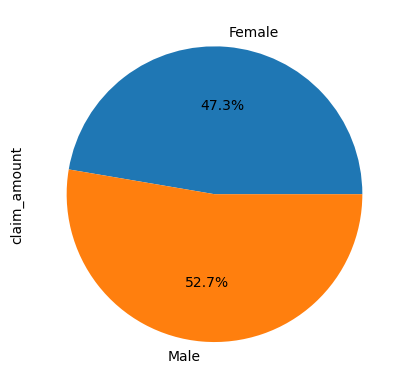

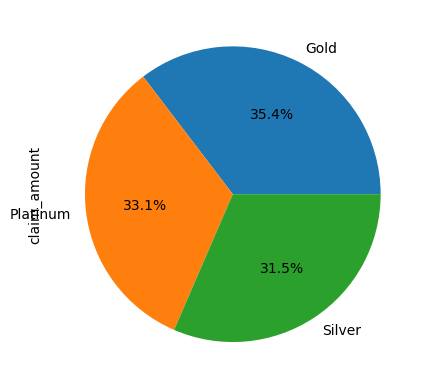

In [83]:
genderwise = final.groupby(['gender'])['claim_amount'].sum()/final.claim_amount.sum()*100
genderwise.plot(kind = 'pie', autopct="%1.1f%%")
plt.show()

segmentwise = final.groupby(['Segment'])['claim_amount'].sum()/final.claim_amount.sum()*100
segmentwise.plot(kind = 'pie', autopct="%1.1f%%")
plt.show()

### 12. Which gender had claimed the most for any type of driver related issues? 

<Axes: >

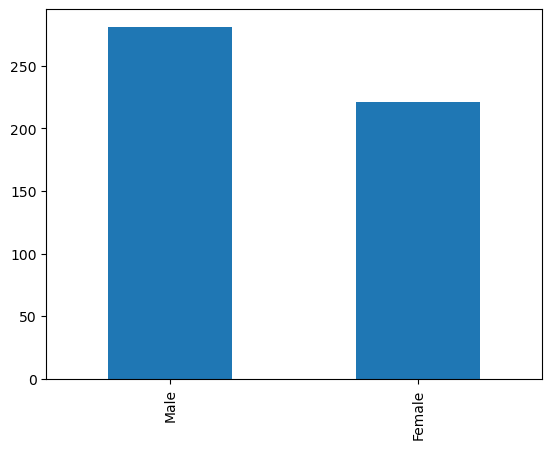

In [84]:
(final.loc[(final.incident_cause.str.contains('driver', case = False))]
 .gender
 .value_counts()
 .plot(kind = 'bar')
)

### 13. Which age group had the maximum fraudulent policy claims?

<Axes: >

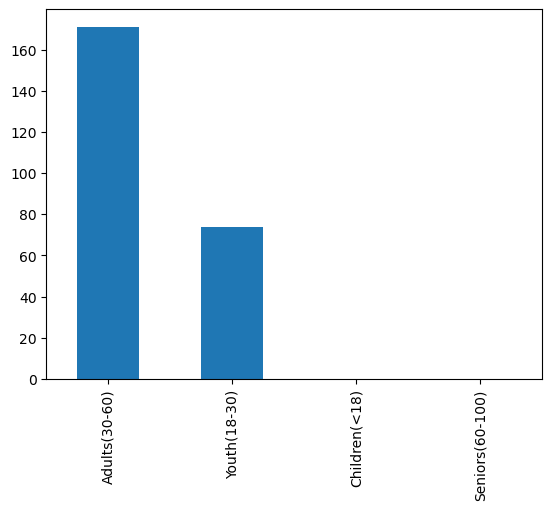

In [85]:
final.loc[final.fraudulent == 'Yes'].Age_Group.value_counts().plot(kind = 'bar')

### 14. Visualize the monthly trend of the total amount 

In [86]:
final['claim_month'] = final.claim_date.dt.month
final['claim_year'] = final.claim_date.dt.year
final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,flag,claim_type,claim_amount,total_policy_claims,...,CUST_ID,gender,DateOfBirth,Age,Age_Group,State,Contact,Segment,claim_month,claim_year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,0,Material only,2980.0,1.0,...,21868593.0,Female,1979-01-12,39,Adults(30-60),VT,789-916-8172,Platinum,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,1,Material only,2980.0,3.0,...,75740424.0,Female,1970-01-13,48,Adults(30-60),ME,265-543-1264,Silver,10,2018
2,13015401,47830476,Natural causes,2018-06-17,Auto,No,0,Material only,1680.0,1.0,...,47830476.0,Female,1986-05-01,32,Adults(30-60),MA,413-187-7945,Silver,6,2018
3,12878692,18401412,Driver error,2018-01-13,Auto,No,0,Material only,1730.0,4.0,...,18401412.0,Male,1999-03-02,19,Youth(18-30),AR,752-398-2914,Gold,1,2018
4,27026412,73486606,Natural causes,2018-04-10,Auto,No,0,Material only,1160.0,3.0,...,73486606.0,Male,1999-10-25,19,Youth(18-30),AK,256-968-9172,Silver,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,0,Material only,1770.0,1.0,...,79539873.0,Female,1981-03-15,37,Adults(30-60),ND,459-425-4319,Platinum,9,2018
1074,63269067,42364152,Other causes,2017-05-09,Home,No,0,Material only,2800.0,1.0,...,42364152.0,Female,1996-07-07,22,Youth(18-30),ID,529-462-1635,Silver,5,2017
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,0,Injury only,33080.0,2.0,...,19888166.0,Male,1990-04-11,28,Youth(18-30),WI,712-651-9613,Gold,5,2017
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,0,Material only,2840.0,4.0,...,11256802.0,Female,1964-10-22,54,Adults(30-60),LA,469-345-5617,Silver,4,2017


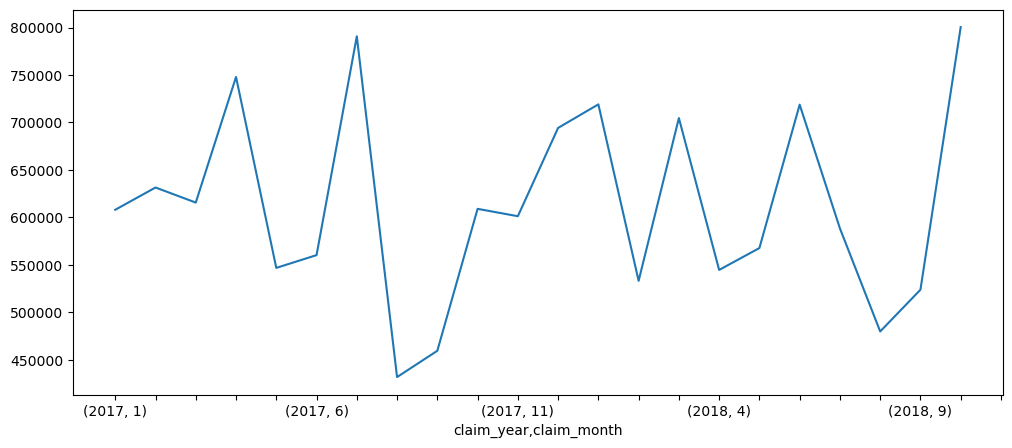

In [87]:
final.groupby(['claim_year','claim_month'])['claim_amount'].sum().plot(figsize=(12,5))
plt.xticks(range(23))
plt.show()

### 15. What is the average claim amount for gender and age categories, for fraudulent and non-fraudulent claims.

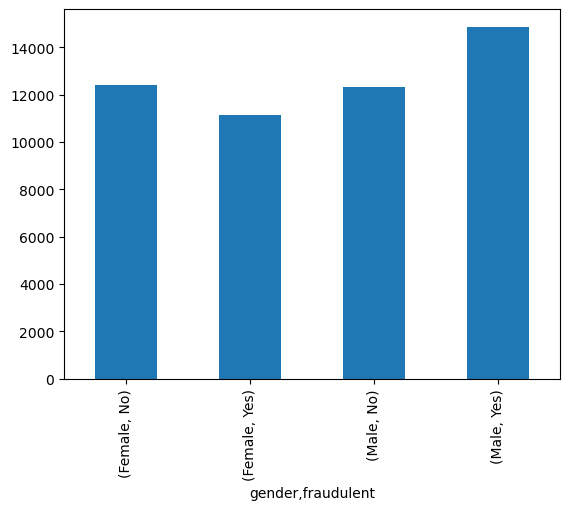

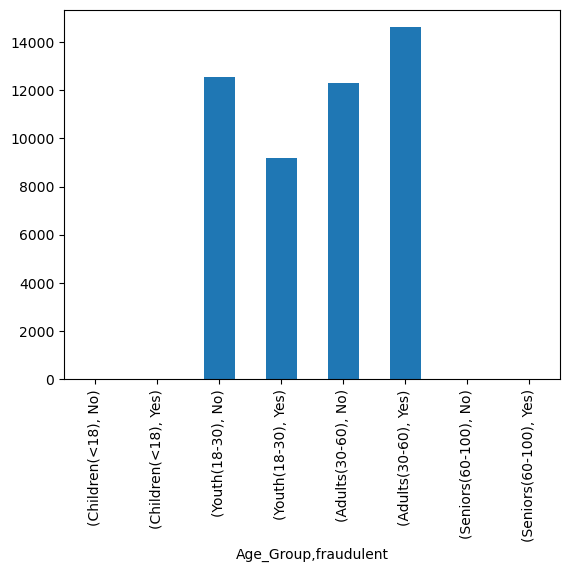

In [88]:
final.groupby(['gender','fraudulent'])['claim_amount'].mean().plot(kind='bar')
plt.show()

final.groupby(['Age_Group','fraudulent'])['claim_amount'].mean().plot(kind='bar')
plt.show()

## Hypothesis Testing

### 16.  Is there any similarity in the amount claimed by males and females?

Since we are comparing 2 independent samples (male vs female claim_amount)

    - we'll choose `independent 2 sample t-test`

Ho - average amounts claimed by men is similar to that of women

Ha - average amounts claimed by men & women are significantly different

significance level - 5%

Assumptions for `independent 2 sample t-test`

1. Indepence of sample - yes (male vs female)
2. normality - yes. as per CLT, as n >30 (i.e. 1078)
4. random sampling - assuming it is

In [89]:
import scipy.stats as stats

In [90]:
f_claim = final.loc[final.gender == 'Female', 'claim_amount']
m_claim = final.loc[final.gender == 'Male', 'claim_amount']

alpha = .05

In [92]:
# performing the t-test
p_value = stats.ttest_ind(f_claim, m_claim)

print(f't-statistic: {p_value[0]}\n')

print(f'p-value for t-statistic: {p_value[1]}\n')

print('Result for hypothesis test:')
if p_value[1] < alpha:
    print('We reject the null hypothesis that average amounts claimed by men is similar to that of women')
else:
    print('We cannot reject the null hypothesis, hence, average amounts claimed by men is similar to that of women')
    
p_value

t-statistic: -0.9621769389700379

p-value for t-statistic: 0.33617690369982034

Result for hypothesis test:
We cannot reject the null hypothesis, hence, average amounts claimed by men is similar to that of women


Ttest_indResult(statistic=-0.9621769389700379, pvalue=0.33617690369982034)

 ### 17. Is there any relationship between age category and segment?

Since it is a Cat.-Cat. comparision, we'll go for `Chi-Squared Test for Independence`

Ho - There is no relation between age category and segment

Ha - There is a significant relation between age category and segment

In [93]:
contingency_table = pd.crosstab(final.Age_Group, final.Segment)
contingency_table

Segment,Gold,Platinum,Silver
Age_Group,,,
Youth(18-30),110,118,107
Adults(30-60),261,243,239


In [94]:
chi2, p_value, dof, exp_values = stats.chi2_contingency(contingency_table)

print(f'Chi-Squared statistic: {chi2:.2f}')
print(f'p_value: {p_value:.2f}')
print(f'Degree of Freedom: {dof:.2f}')
print(f'Expected Values: \n{exp_values}')

Chi-Squared statistic: 0.79
p_value: 0.67
Degree of Freedom: 2.00
Expected Values: 
[[115.29220779 112.18460111 107.52319109]
 [255.70779221 248.81539889 238.47680891]]


In [95]:
#interpreting the results

if p_value > alpha:
    print('We cannot reject the null hypothesis, hence age-category & segment are independent')
else:
    print('We reject the null hypothesis, that age-category & segment are independent')


We cannot reject the null hypothesis, hence age-category & segment are independent


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was USD10,000.

Ho - average claim amount of 2017-18 = 2016-17 (10,000 USD)

Ha - average claim amount of 2017-18 > 2016-17 (10,000 USD)

Hence we'll go for `1-tailed t-test`

alpha = .05

In [96]:
fy16 = (final.loc[((final['claim_date']>='2016-04-01') & (final['claim_date']<'2017-04-01'))]
         .claim_amount)
fy16.mean()

11379.542923897734

In [97]:
fy17 = (final.loc[((final['claim_date']>='2017-04-01') & (final['claim_date']<'2018-04-01'))]
         .claim_amount)
fy17.mean()

12977.70786657792

In [98]:
# performing t-test
t_stat, p_value = stats.ttest_1samp(fy17, 10000, alternative='greater')
print(f't-statistic: {t_stat:.2f}\n')
print(f'p-value: {p_value:.9f}')

t-statistic: 5.19

p-value: 0.000000145


In [133]:
# interpreting the result
if p_value > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We reject the null hypothesis, that avg claim amount is similar for both 2016-17 & 2017-18 FYs')
    print(f'Also, since p-value: {p_value:.9f} << 5% significant level, rise is statistically significant')

We reject the null hypothesis, that avg claim amount is for both 2016-17 & 2017-18 FYs


### 19. Is there any difference between age groups and insurance claims?

In [105]:
final.Age_Group

0       Adults(30-60)
1       Adults(30-60)
2       Adults(30-60)
3        Youth(18-30)
4        Youth(18-30)
            ...      
1073    Adults(30-60)
1074     Youth(18-30)
1075     Youth(18-30)
1076    Adults(30-60)
1077     Youth(18-30)
Name: Age_Group, Length: 1078, dtype: category
Categories (4, object): ['Children(<18)' < 'Youth(18-30)' < 'Adults(30-60)' < 'Seniors(60-100)']

In [104]:
final.total_policy_claims.value_counts()

1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

Since it is a **_Cat.-Cat. comparision_**, we'll go for `Chi-Squared Test for Independence`

Ho - age-group and insurance claims are independent

Ha - age-group and insurance claims are associated

In [107]:
contingency_table = pd.crosstab(final.Age_Group, final.total_policy_claims)
contingency_table

total_policy_claims,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Age_Group,,,,,,,,
Youth(18-30),251,27,22,18,11,4,1,1
Adults(30-60),538,78,63,41,16,6,1,0


In [109]:
chi2, p_value, dof, exp_values = stats.chi2_contingency(contingency_table)

print(f'Chi-Squared statistic: {chi2:.2f}')
print(f'p_value: {p_value:.2f}')
print(f'Degree of Freedom: {dof:.2f}')
print(f'Expected Values: \n{exp_values}')

Chi-Squared statistic: 6.79
p_value: 0.45
Degree of Freedom: 7.00
Expected Values: 
[[2.45190167e+02 3.26298701e+01 2.64146568e+01 1.83348794e+01
  8.39053803e+00 3.10760668e+00 6.21521336e-01 3.10760668e-01]
 [5.43809833e+02 7.23701299e+01 5.85853432e+01 4.06651206e+01
  1.86094620e+01 6.89239332e+00 1.37847866e+00 6.89239332e-01]]


In [110]:
#interpreting the results

if p_value > alpha:
    print('We cannot reject the null hypothesis, hence age-category & insurance_claim are independent')
else:
    print('We reject the null hypothesis, that age-category & insurance_claim are independent')


We cannot reject the null hypothesis, hence age-category & insurance_claim are independent


### 20. Is there any relationship between total number of policy claims and the claimed amount?

Since we have to calculate the relationship test, we'll go for `Pearson's Correlation Test`

Ho - no relation b/w policy claims & claim amount

Ha - there is relation b/w policy claims & claim amount

alpha = .05

In [114]:
final.total_policy_claims.value_counts()

1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [115]:
final.claim_amount

0        2980.0
1        2980.0
2        1680.0
3        1730.0
4        1160.0
         ...   
1073     1770.0
1074     2800.0
1075    33080.0
1076     2840.0
1077     1490.0
Name: claim_amount, Length: 1078, dtype: float64

In [116]:
total_claims = final.total_policy_claims
amount = final.claim_amount

In [117]:
corr, p_value = stats.pearsonr(total_claims, amount)

print(f'Correlation Coefficient: {corr:.2f}')
print(f'p_value: {p_value:.2f}')

Correlation Coefficient: -0.02
p_value: 0.46


In [118]:
# interpreting result

if p_value > alpha:
    print('We cannot reject the null hypothesis, hence no relation b/w policy claims & claim amount')
else:
    print('We reject null hypothesis')

We cannot reject the null hypothesis, hence no relation b/w policy claims & claim amount
